<a href="https://colab.research.google.com/github/a-forty-two/EY_batch7_18Sep/blob/main/19_Sep_001_Intro_To_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supervised v/s Unsupervised
# Supervised-> LABELS are identified
# Unsupervised -> we don't know what column could be a label!!!

# Supervised-> Classification and Regression
# Unsupervised -> Clustering, Recommendation engine, matrix factorization, reducing features



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY_batch7_18Sep/refs/heads/main/data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Pandas - 2 ways of slicing and dicing
# either by index of columns or by names of columns
# index -> iloc
# name -> loc

In [8]:
# exclude the last column and include all others
# loc and iloc => [row selection, column selection]
# :   means that all the values in that selection should be considered
#.  2:4 means 2,3
#.  3:5 means 3,4
#.  1:-1 means ignore the first and the last column

data = data.iloc[ : , :-1 ]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

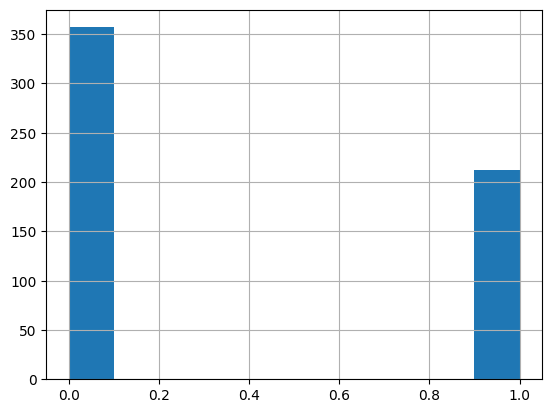

In [11]:
Y = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
Y.hist()

In [12]:
data.columns # i want to select maybe only a few columns to experiment
# just for sampling lets go with all MEAN VALUES!

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
considered_cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

considered_data = data.loc[ :, considered_cols]
considered_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [18]:
# HEATMAP -> correlations
input_cols = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
data2 = data.loc[:, input_cols]
data2.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

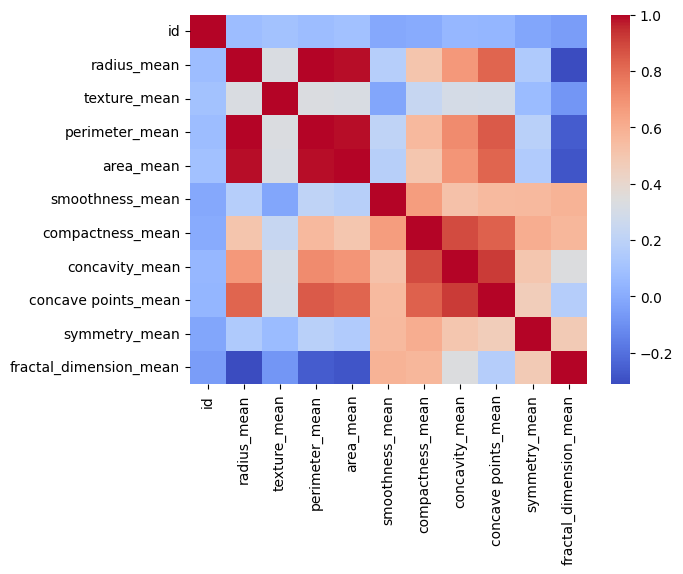

In [19]:
sns.heatmap(data2.corr(), cmap='coolwarm')

In [20]:
# if you want to use a UNIQUE-VALUED column in dataset without including in ML
# you can make it an INDEX

In [22]:
# how many unique values exist in each column

considered_data.nunique()

# since ID has distinct values per row, we can convert it into INDEX!

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [24]:
considered_data.set_index('id', inplace=True)
considered_data.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570
925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171
925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502
925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152
926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [25]:
Y = considered_data['diagnosis']
X = considered_data.iloc[:, 1:]

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [27]:
Y.head()

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [28]:
# we always calculate assumptions on training data and then apply them to testing data

# assumption -> stats -> Mean, Standard Dev, Min, Max

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [29]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
893548,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518
862028,15.06,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,0.06284
852781,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,0.1697,0.05699
918465,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608
866083,13.61,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,0.06130


In [31]:
ytrain.head()

,diagnosis
id,
893548,B
862028,M
852781,M
918465,B
866083,M


In [30]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
857810,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501
911408,12.83,15.73,82.89,506.9,0.09040,0.08269,0.058350,0.030780,0.1705,0.05913
9012795,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183
8612399,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,0.06022
904302,11.06,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,0.06214


In [32]:
ytest.head()

,diagnosis
id,
857810,B
911408,B
9012795,M
8612399,M
904302,B


In [34]:
# statistical assumptions-> lets extract mean, std from xtrain and apply it to testing data

xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,13.997824,3.471943,6.98100,11.650000,13.20000,15.635000,28.11000
texture_mean,455.0,19.304110,4.162348,10.72000,16.335000,18.90000,21.750000,33.81000
perimeter_mean,455.0,91.033824,23.847329,43.79000,74.700000,85.79000,102.850000,188.50000
area_mean,455.0,642.585275,345.930124,143.50000,416.700000,538.90000,759.950000,2501.00000
smoothness_mean,455.0,0.095783,0.013746,0.05263,0.085925,0.09495,0.104850,0.16340
compactness_mean,455.0,0.102458,0.050556,0.01938,0.064710,0.09228,0.129800,0.31140
concavity_mean,455.0,0.085888,0.076505,0.00000,0.028730,0.06195,0.121100,0.42680
concave points_mean,455.0,0.046928,0.036993,0.00000,0.019675,0.03250,0.066275,0.20120
symmetry_mean,455.0,0.180279,0.027041,0.10600,0.160450,0.17840,0.196300,0.27430
fractal_dimension_mean,455.0,0.062703,0.006936,0.04996,0.057645,0.06155,0.066175,0.09502


In [35]:
mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']

In [36]:
#normalize both xtrain and xtest with same mu and sigma

xtrain_norm = (xtrain - mu)/sigma
xtest_norm = (xtest - mu)/sigma

In [37]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
893548,-0.272995,-1.312747,-0.349046,-0.323722,-0.892112,-1.287827,-1.063055,-1.029918,-1.293540,-1.084577
862028,0.305931,0.126345,0.388562,0.182160,0.590552,1.045211,1.099437,1.114323,0.193079,0.019811
852781,1.328413,0.227249,1.302711,1.304930,-0.100582,0.081930,0.824944,0.821291,-0.391214,-0.823618
918465,-0.555258,-1.408846,-0.553681,-0.570593,1.034333,-0.244636,-0.628429,-0.512220,-0.539136,0.486941
866083,-0.111702,1.293955,-0.137283,-0.202310,-0.232988,-0.471511,-0.431840,-0.434636,-0.154538,-0.202220


In [38]:
xtest_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
857810,-0.272995,0.001415,-0.353240,-0.333551,-1.104545,-1.277146,-1.113601,-1.155943,0.059949,-1.109087
911408,-0.336360,-0.858676,-0.341498,-0.392233,-0.391586,-0.391007,-0.359949,-0.436529,-0.361629,-0.515082
9012795,2.123357,-1.010033,2.107833,2.149031,0.314099,0.970047,1.402686,2.123985,0.629450,-0.125807
8612399,1.285210,-0.188382,1.260778,1.250006,0.215157,0.056216,0.622343,1.108917,1.217441,-0.357930
904302,-0.846161,-1.074900,-0.869021,-0.764274,-1.336620,-1.083501,-0.768159,-1.072710,-0.990299,-0.081112


In [45]:
# outliers-> anything greater than 3 or less than -3 z-score is definitely an outlier

xtrain_norm > 3

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
893548,False,False,False,False,False,False,False,False,False,False
862028,False,False,False,False,False,False,False,False,False,False
852781,False,False,False,False,False,False,False,False,False,False
918465,False,False,False,False,False,False,False,False,False,False
866083,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
894335,False,False,False,False,False,False,False,False,False,False
879830,False,False,False,False,False,False,False,False,False,False
886776,False,False,False,False,False,False,False,False,False,False


In [47]:
outliers = xtrain_norm[(xtrain_norm > 3) | (xtrain_norm < -3)].dropna(how='all')
outliers


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
873593,NaN,NaN,NaN,NaN,NaN,3.575059,NaN,NaN,NaN,NaN
89812,NaN,NaN,NaN,3.192595,NaN,NaN,NaN,NaN,NaN,NaN
859711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.906794
92751,NaN,NaN,NaN,NaN,-3.139389,NaN,NaN,NaN,NaN,NaN
915186,NaN,NaN,NaN,NaN,4.919233,NaN,NaN,NaN,NaN,4.659392
887181,NaN,NaN,NaN,NaN,NaN,4.132852,3.028728,NaN,NaN,NaN
915143,NaN,NaN,NaN,3.004696,NaN,NaN,NaN,NaN,NaN,NaN
8710441,NaN,NaN,NaN,NaN,NaN,NaN,4.246953,NaN,NaN,4.362390
90439701,NaN,NaN,NaN,NaN,NaN,3.068694,3.045721,NaN,NaN,NaN


In [48]:

ytest.value_counts()

,count
diagnosis,
B,67
M,47


In [49]:
# we should also convert M and B into 1 and 0
encoding_logic = {'M':1, 'B':0}
ytrain = ytrain.apply(lambda x: encoding_logic[x])
ytest = ytest.apply(lambda x: encoding_logic[x])

In [50]:
ytest.value_counts()

,count
diagnosis,
0,67
1,47


In [51]:
# algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
models = {
    'naive_bayes' : GaussianNB(),
    'knn' : KNeighborsClassifier(),
    'svc' : SVC(),
    'linear_svc' : LinearSVC(),
    'decision_tree' : DecisionTreeClassifier(),
    'decision_tree100' : DecisionTreeClassifier(max_depth=100),
    'decision_tree200' : DecisionTreeClassifier(max_depth=200),
    'decision_tree300' : DecisionTreeClassifier(max_depth=300),
    'random_forest' : RandomForestClassifier(),
    'random_forest200' : RandomForestClassifier(n_estimators=200),
    'random_forest400' : RandomForestClassifier(n_estimators=400),
    'random_forest500' : RandomForestClassifier(n_estimators=500),
    'logistic_regression' : LogisticRegression()
}


In [55]:
#measure the performance of mdoels -> accuracy
# total correct guesses / total guesses
from sklearn.metrics import accuracy_score

In [57]:
max_accuracy = 0
best_model_name = None
best_model = None
for model_name, model in models.items():
  model.fit(xtrain_norm, ytrain)
  p = model.predict(xtest_norm)
  print(model_name, accuracy_score(ytest, p))
  print('****')
  if accuracy_score(ytest, p) > max_accuracy:
    max_accuracy = accuracy_score(ytest, p)
    best_model_name = model_name
    best_model = model



naive_bayes 0.9298245614035088
****
knn 0.9298245614035088
****
svc 0.9210526315789473
****
linear_svc 0.9473684210526315
****
decision_tree 0.9473684210526315
****
decision_tree100 0.9122807017543859
****
decision_tree200 0.9298245614035088
****
decision_tree300 0.9122807017543859
****


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


random_forest 0.9649122807017544
****
random_forest200 0.9649122807017544
****
random_forest400 0.956140350877193
****
random_forest500 0.9649122807017544
****
logistic_regression 0.956140350877193
****


In [58]:
best_model_name

'random_forest'